In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'blotta' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=blotta:US:bquxjob_2097d0d8_1881b33988d)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_668d5903_18a65fffb4a') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT sexo, id_municipio, ano, tempo_emprego, quantidade_horas_contratadas, valor_remuneracao_media_sm, cbo_2002, idade, tipo_vinculo FROM `basedosdados.br_me_rais.microdados_vinculos` WHERE cbo_2002 LIKE "2611%%" OR cbo_1994 ="15210" OR cbo_1994 = "15220" OR cbo_1994 = "15230" OR cbo_1994 = "15240" OR cbo_1994 = "15245" OR cbo_1994 = "15250"



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [5]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_29f68e97_18a6d8b0de2') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,sexo,id_municipio,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,cbo_2002,idade,tipo_vinculo
0,1,1200401,1985,0.6,<NA>,13.19,None,<NA>,1
1,1,1200401,1985,3.1,<NA>,4.44,None,<NA>,1
2,1,1200401,1985,0.0,<NA>,2.61,None,<NA>,1
3,1,1200401,1985,0.3,<NA>,1.40,None,<NA>,1
4,1,1400100,1991,0.8,<NA>,7.21,None,<NA>,1
...,...,...,...,...,...,...,...,...,...
1315048,2,3554102,2020,131.2,30,5.47,261120,32,10
1315049,2,3554102,2020,13.9,30,2.84,261135,23,10
1315050,2,3555000,2020,9.3,40,2.37,261125,28,31
1315051,2,3556453,2020,185.8,40,6.88,261110,43,31


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [6]:
#importar bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import csv
import pandas as pd

In [7]:
#estatísticas descritivas

results.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1315053.0,1.315053e+06,1188962.0,1.315053e+06,1188962.0
mean,2008.529676,4.702096e+01,37.176779,6.845815e+00,35.037809
std,9.03975,7.113133e+01,7.672303,8.835569e+00,10.924951
min,1985.0,0.000000e+00,0.0,0.000000e+00,0.0
25%,2004.0,5.900000e+00,30.0,1.980000e+00,27.0
50%,2010.0,1.980000e+01,40.0,4.090000e+00,33.0
75%,2015.0,5.490000e+01,44.0,8.110000e+00,41.0
max,2021.0,5.999000e+02,60.0,1.499700e+02,100.0


In [8]:
#limpeza 1

results = results.drop(columns=['cbo_2002'])

#Plotagem dos boxplots

<Axes: >

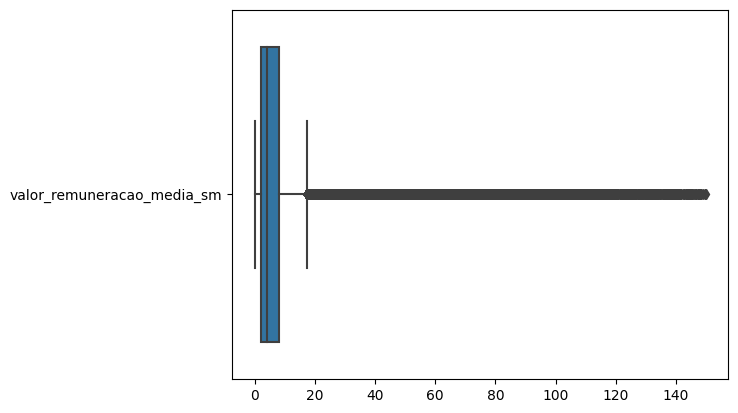

In [9]:
boxplot = results.drop(columns=['ano', 'tempo_emprego', 'idade', 'quantidade_horas_contratadas'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

In [10]:
#Limpeza 2

idadeusar = results.dropna(subset=['idade'])
horasusar = results.dropna(subset=['quantidade_horas_contratadas'])

<Axes: >

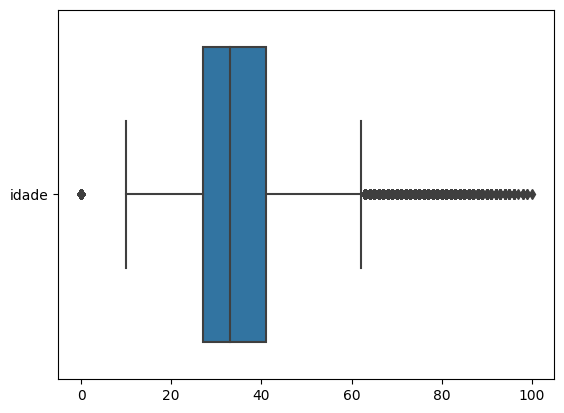

In [11]:
boxplot = idadeusar.drop(columns=['ano', 'tempo_emprego', 'valor_remuneracao_media_sm', 'quantidade_horas_contratadas'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

<Axes: >

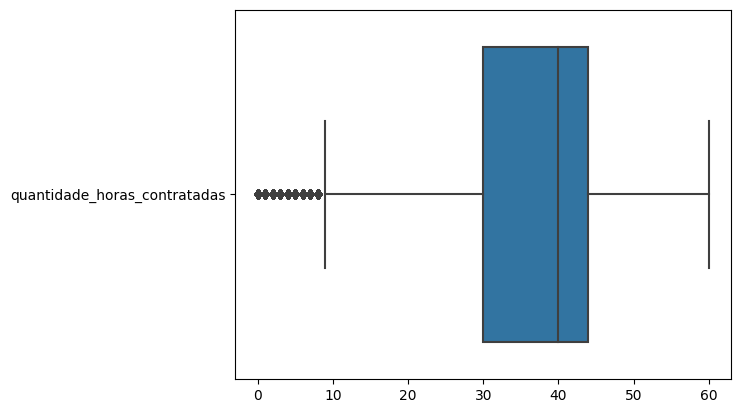

In [12]:
boxplot = horasusar.drop(columns=['ano', 'tempo_emprego', 'valor_remuneracao_media_sm', 'idade'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

<Axes: >

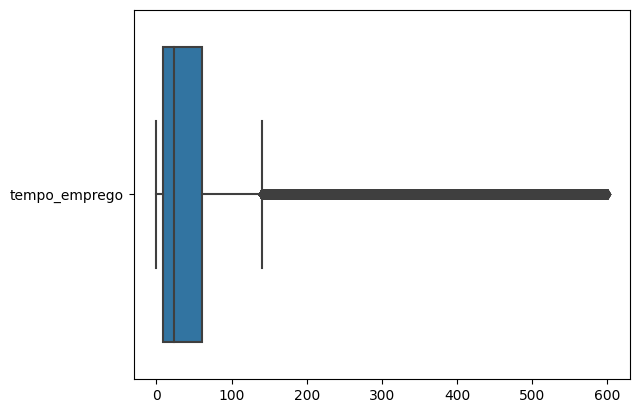

In [13]:
tempoempregousar = results.loc[results.ano >= 1994]
tempoempregousar_plotar = tempoempregousar.drop(columns=['idade', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'ano'])
sns.boxplot(data=tempoempregousar_plotar, orient='h', saturation=0.75, width=0.8)

#Remoção de Outliers

In [14]:
q25 = np.percentile(results.valor_remuneracao_media_sm, 25)
q75 = np.percentile(results.valor_remuneracao_media_sm, 75)
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

results.loc[results.valor_remuneracao_media_sm < min] = np.nan
results.loc[results.valor_remuneracao_media_sm > max] = np.nan

In [15]:
q25 = np.percentile(idadeusar.idade, 25)
q75 = np.percentile(idadeusar.idade, 75)
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

idadeusar.loc[idadeusar.idade < min] = np.nan
idadeusar.loc[idadeusar.idade > max] = np.nan

In [16]:
q25 = np.percentile(horasusar.quantidade_horas_contratadas, 25)
q75 = np.percentile(horasusar.quantidade_horas_contratadas, 75)
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

horasusar.loc[horasusar.quantidade_horas_contratadas < min] = np.nan
horasusar.loc[horasusar.quantidade_horas_contratadas > max] = np.nan

In [17]:
q25 = np.percentile(tempoempregousar.tempo_emprego, 25)
q75 = np.percentile(tempoempregousar.tempo_emprego, 75)
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

tempoempregousar.loc[tempoempregousar.tempo_emprego < min] = np.nan
tempoempregousar.loc[tempoempregousar.tempo_emprego > max] = np.nan

In [18]:
idadeusar = idadeusar.dropna()
remuneracao = results.dropna(subset=['valor_remuneracao_media_sm'])
horasusar = horasusar.dropna()
tempoempregousar = tempoempregousar.dropna()

In [19]:
#estatísticas descritivas

idadeusar.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1166053.0,1.166053e+06,1166053.0,1.166053e+06,1166053.0
mean,2010.56267,4.921501e+01,37.216351,6.476651e+00,34.413303
std,6.761651,6.866996e+01,7.645872,8.575888e+00,9.986952
min,1994.0,0.000000e+00,0.0,0.000000e+00,10.0
25%,2006.0,8.100000e+00,30.0,1.890000e+00,27.0
50%,2011.0,2.290000e+01,40.0,3.830000e+00,32.0
75%,2016.0,5.920000e+01,44.0,7.550000e+00,41.0
max,2021.0,5.973000e+02,60.0,1.499700e+02,62.0


In [20]:
#estatísticas descritivas

horasusar.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1178699.0,1.178699e+06,1178699.0,1.178699e+06,1178699.0
mean,2010.54771,5.143647e+01,37.463152,6.545069e+00,35.005403
std,6.763321,7.332964e+01,7.036461,8.672815e+00,10.906703
min,1994.0,0.000000e+00,9.0,0.000000e+00,0.0
25%,2006.0,8.400000e+00,30.0,1.900000e+00,27.0
50%,2011.0,2.320000e+01,40.0,3.860000e+00,33.0
75%,2016.0,6.090000e+01,44.0,7.630000e+00,41.0
max,2021.0,5.999000e+02,60.0,1.499700e+02,100.0


In [21]:
#estatísticas descritivas

remuneracao.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1211291.0,1.211291e+06,1103505.0,1.211291e+06,1103505.0
mean,2009.028888,4.389328e+01,37.335878,4.871225e+00,34.479337
std,8.854089,6.682123e+01,7.704103,3.857945e+00,10.743391
min,1985.0,0.000000e+00,0.0,0.000000e+00,0.0
25%,2005.0,5.900000e+00,30.0,1.860000e+00,26.0
50%,2011.0,1.890000e+01,40.0,3.670000e+00,32.0
75%,2016.0,5.090000e+01,44.0,6.800000e+00,40.0
max,2021.0,5.999000e+02,60.0,1.730000e+01,100.0


In [22]:
#estatísticas descritivas

tempoempregousar.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1074521.0,1.074521e+06,1074521.0,1.074521e+06,1074521.0
mean,2010.551341,3.158897e+01,37.432033,6.006903e+00,33.549296
std,6.720733,3.240777e+01,7.643126,8.172158e+00,9.95495
min,1994.0,0.000000e+00,0.0,0.000000e+00,0.0
25%,2006.0,7.300000e+00,30.0,1.800000e+00,26.0
50%,2011.0,1.980000e+01,40.0,3.560000e+00,31.0
75%,2016.0,4.560000e+01,44.0,6.900000e+00,39.0
max,2021.0,1.401000e+02,60.0,1.499700e+02,100.0


#Correlações

<ipython-input-23-5b0c9da66bb2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tempoempregousar.corr()


<Axes: >

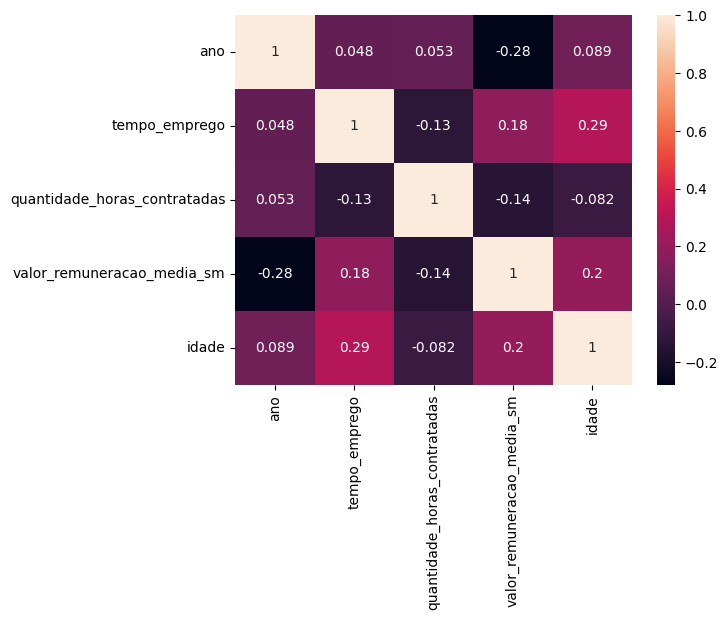

In [23]:
corr_matrix = tempoempregousar.corr()
sns.heatmap(corr_matrix, annot = True)

<ipython-input-24-66634d3b482c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = remuneracao.corr()


<Axes: >

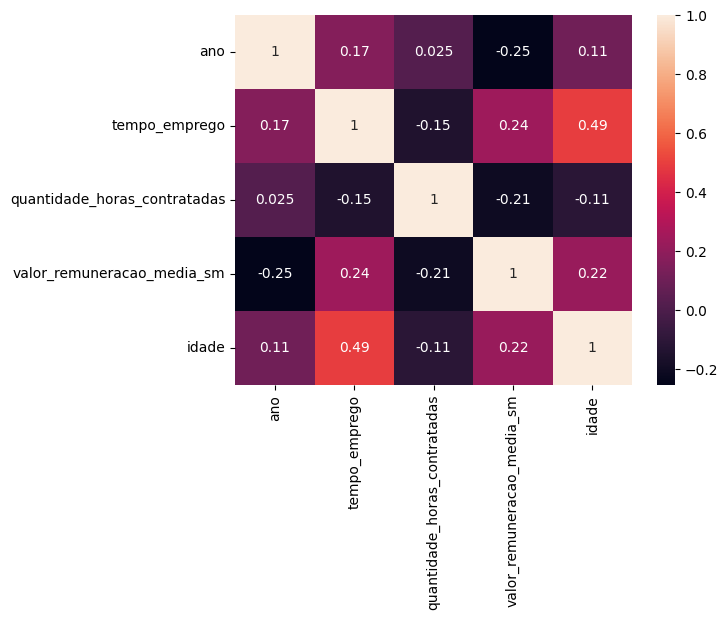

In [24]:
corr_matrix = remuneracao.corr()
sns.heatmap(corr_matrix, annot = True)

<ipython-input-25-eff8b5b4f8c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = horasusar.corr()


<Axes: >

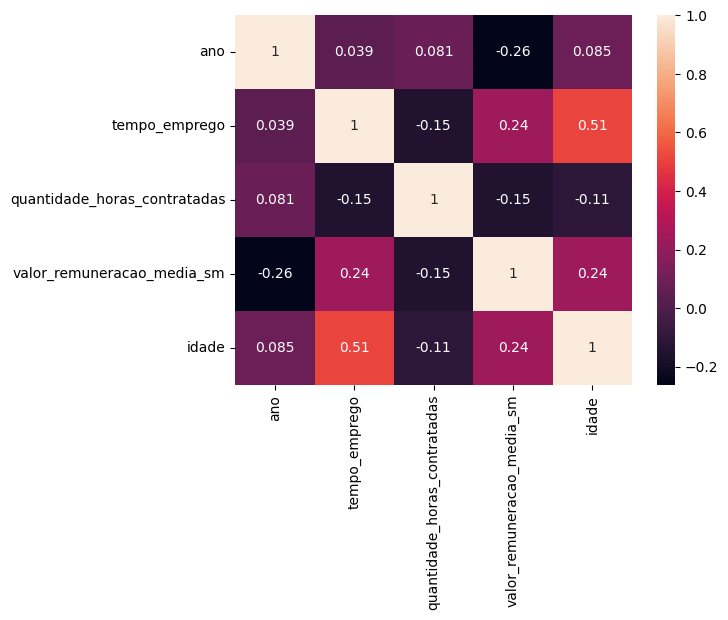

In [25]:
corr_matrix = horasusar.corr()
sns.heatmap(corr_matrix, annot = True)

<ipython-input-26-869ba13ccab3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = idadeusar.corr()


<Axes: >

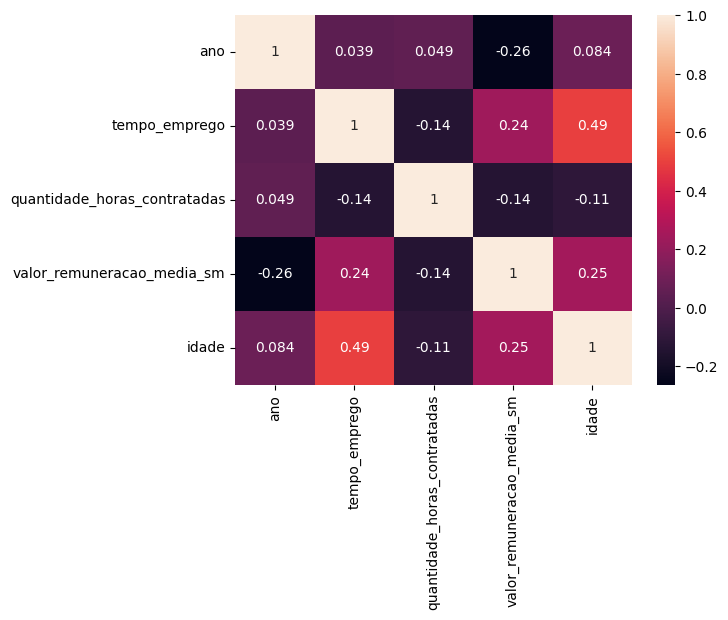

In [26]:
corr_matrix = idadeusar.corr()
sns.heatmap(corr_matrix, annot = True)

<ipython-input-27-6637a8e5a363>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = results.corr()


<Axes: >

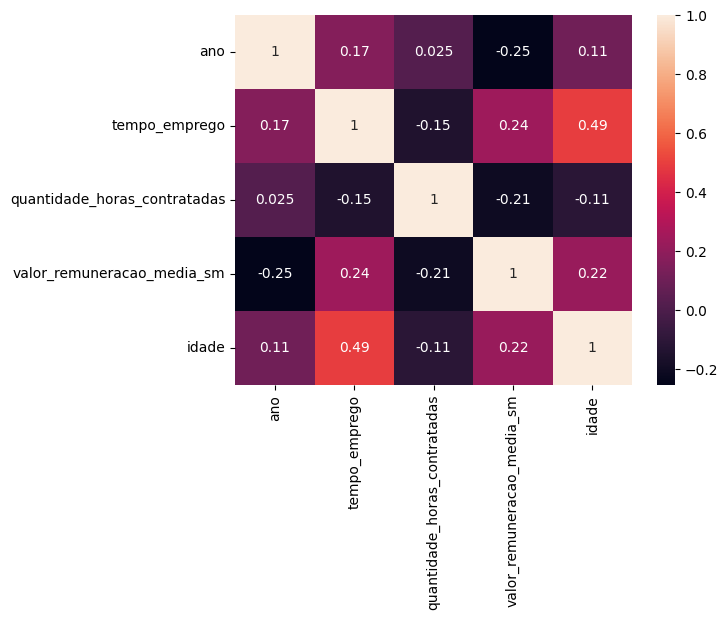

In [27]:
corr_matrix = results.corr()
sns.heatmap(corr_matrix, annot = True)

#Plotagens e produção de medidas agregadas

In [28]:
#Para plotagem

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

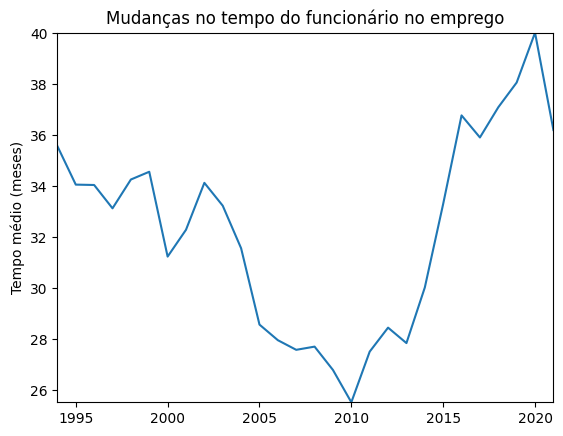

In [29]:
#Tempo médio do funcionário na empresa

fig, ax = plt.subplots()
groupbyyear = tempoempregousar.loc[:, ['ano', 'tempo_emprego']].groupby('ano')
avgs = groupbyyear.mean()
x = avgs.index
y = avgs.tempo_emprego
a = np.asarray(y)
plot(x, y, ax, 'Mudanças no tempo do funcionário no emprego', 'Tempo médio (meses)')
pd.DataFrame(a, index = x).to_csv('tempo.csv', sep = ';', header  = ['tempo_emprego'])

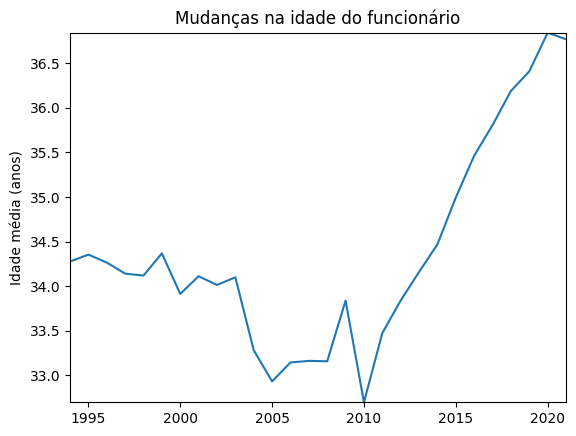

In [30]:
#Idade

fig, ax = plt.subplots()
groupbyyear = idadeusar.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x1 = avgs.index
y1 = avgs.idade
a1 = np.asarray(y1)
plot(x1, a1, ax, 'Mudanças na idade do funcionário', 'Idade média (anos)')
pd.DataFrame(a1, index = x1).to_csv('idade.csv', sep = ';', header  = ['idade'])

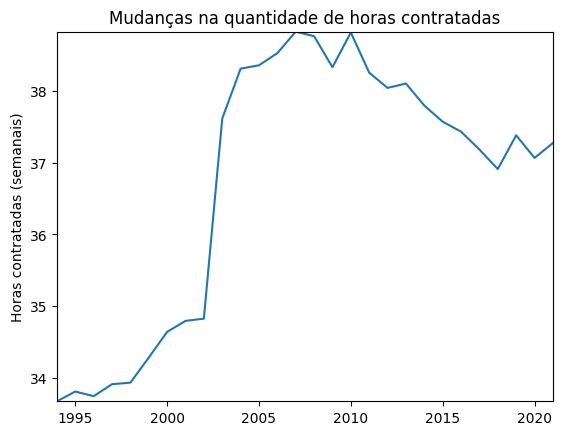

In [31]:
# Análise de horas contratadas

fig, ax = plt.subplots()
groupbyyear = horasusar.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x2 = avgs.index
y2 = avgs.quantidade_horas_contratadas
a2 = np.asarray(y2)
plot(x2, a2, ax, 'Mudanças na quantidade de horas contratadas', 'Horas contratadas (semanais)')
pd.DataFrame(a2, index = x2).to_csv('horas.csv', sep = ';', header  = ['quantidade_horas_contratadas'])

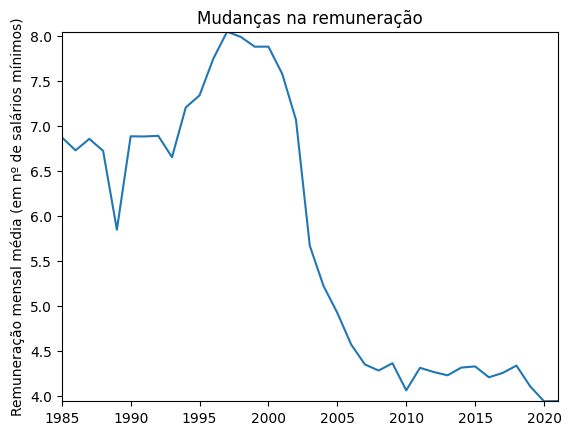

In [32]:
# Análise de remuneração

fig, ax = plt.subplots()
groupbyyear = remuneracao.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x3 = avgs.index
y3 = avgs.valor_remuneracao_media_sm
a3 = np.asarray(y3)
plot(x3, a3, ax, 'Mudanças na remuneração', 'Remuneração mensal média (em nº de salários mínimos)')
pd.DataFrame(a3, index  = x3).to_csv('salário.csv', sep = ';', header  = ['remuneracao'])

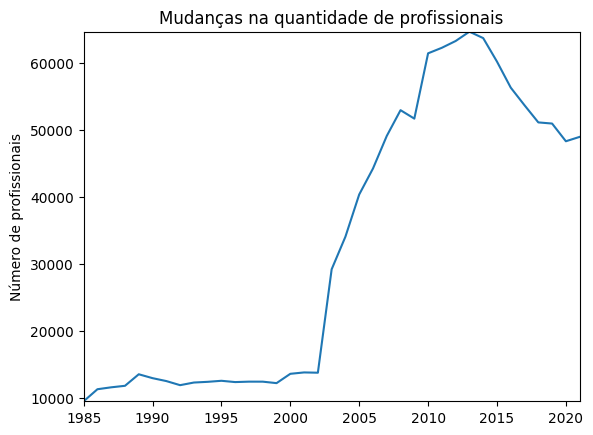

In [59]:
#Análise do número de profissionais

profissionais = results.dropna(subset=['ano'])
fig, ax = plt.subplots()
groupbyyear = profissionais.loc[:, ['ano']].groupby('ano')
counts1 = groupbyyear.ano.value_counts()
a4 = np.asarray(counts1)
plot(x3, a4, ax, 'Mudanças na quantidade de profissionais', 'Número de profissionais')
pd.DataFrame(a4).to_csv('profissionais.csv', sep = ';', header = ['total'])

In [34]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_62de1648_18a6d9d843d') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT ano, tipo_vinculo FROM `blotta._d731c8db3b43ddb417ba10d6e72a9c633c4d7cfd.anon86d4c960bfeaa1af3f114c70fe6c962edfa8e7593ff67477392ac48fa598f5c2` WHERE tipo_vinculo='95' OR tipo_vinculo='90' OR tipo_vinculo='50' OR tipo_vinculo='40' OR tipo_vinculo='5' OR tipo_vinculo='4' OR tipo_vinculo='3'


In [35]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_62de1648_18a6d9d843d') # Job ID inserted based on the query results selected to explore
results1 = job.to_dataframe()
results1

,ano,tipo_vinculo
0,1991,4
1,1993,5
2,1993,5
3,2003,95
4,1992,5
...,...,...
44255,2020,50
44256,2020,90
44257,2020,50
44258,2020,90


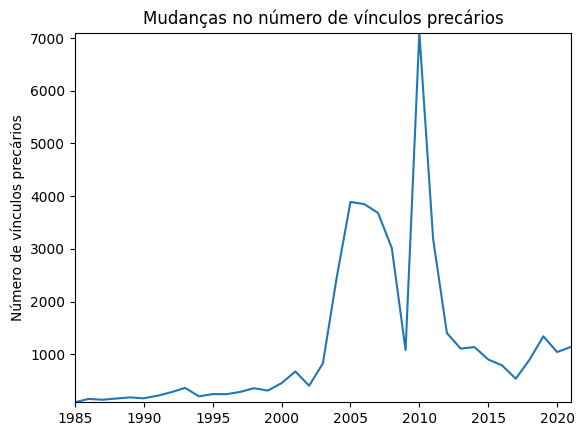

In [36]:
#Análise do número de vínculos precários

fig, ax = plt.subplots()
groupbyyear = results1.loc[:, ['ano', 'tipo_vinculo']].groupby('ano')
counts2 = groupbyyear.ano.value_counts()
a5 = np.asarray(counts2)
plot(x3, a5, ax, 'Mudanças no número de vínculos precários', 'Número de vínculos precários')
pd.DataFrame(a5).to_csv('precários.csv', sep = ';', header = ['total'])

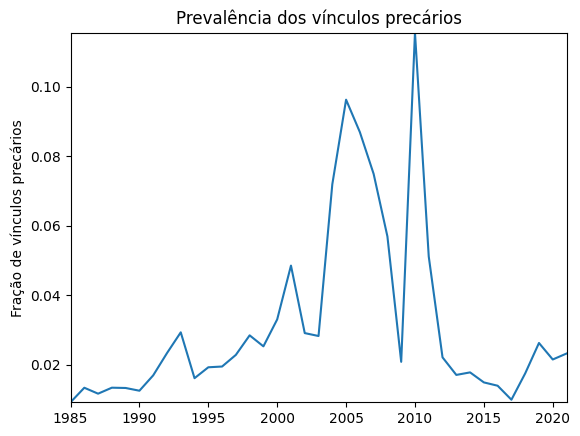

In [37]:
#Análise da prevalência de vínculos precários

fig, ax = plt.subplots()
a6 = a5/a4
plot(x3, a6, ax, 'Prevalência dos vínculos precários', 'Fração de vínculos precários')
pd.DataFrame(a6).to_csv('precários_prevalencia.csv', sep = ';', header = ['fracao'])

In [38]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_5527a83b_18a6d9e3124') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT ano FROM `blotta._d731c8db3b43ddb417ba10d6e72a9c633c4d7cfd.anon86d4c960bfeaa1af3f114c70fe6c962edfa8e7593ff67477392ac48fa598f5c2` WHERE cbo_2002='261110'


In [40]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_5527a83b_18a6d9e3124') # Job ID inserted based on the query results selected to explore
results2 = job.to_dataframe()
results2

,ano
0,2004
1,2004
2,2005
3,2006
4,2008
...,...
213588,2020
213589,2020
213590,2020
213591,2020


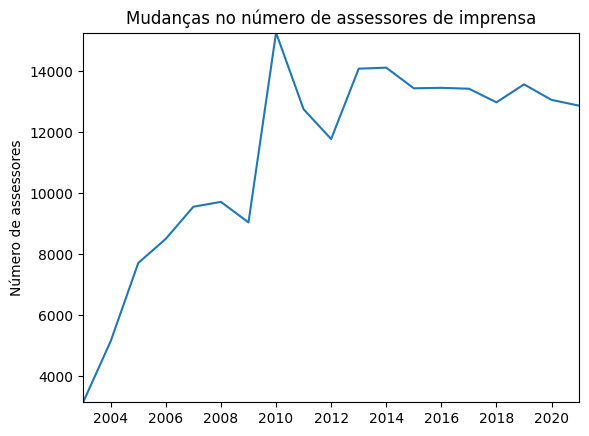

In [65]:
#Análise do número de assessores de imprensa

fig, ax = plt.subplots()
groupbyyear = results2.loc[:, ['ano']].groupby('ano')
avgs = groupbyyear.mean()
x_2 = avgs.index
counts3 = groupbyyear.ano.value_counts()
a7 = np.asarray(counts3)
plot(x_2, a7, ax, 'Mudanças no número de assessores de imprensa', 'Número de assessores')

In [69]:
#criação da medida de prevalência de assessores

a4 = pd.DataFrame(a4, columns = ['total'])
a4['ano'] = range(1985, 2022)
a4_assessores = a4.loc[(a4['ano'] > 2002)]
a8 = a7/a4_assessores['total']

18    0.107289
19    0.150762
20    0.190712
21    0.191940
22    0.194357
23    0.183266
24    0.174710
25    0.248236
26    0.204634
27    0.185922
28    0.217598
29    0.221395
30    0.223048
31    0.238703
32    0.249865
33    0.253620
34    0.266017
35    0.270015
36    0.262551
Name: total, dtype: float64


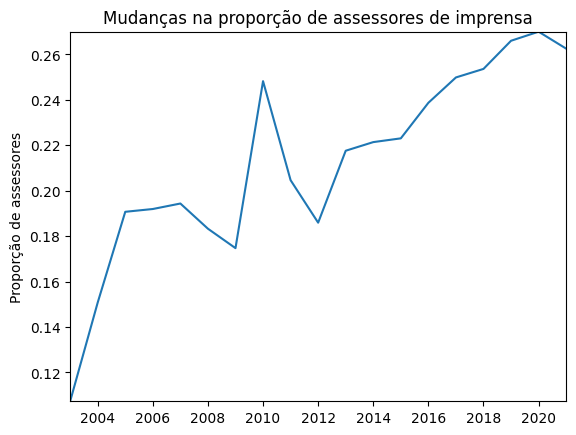

In [61]:
#plotagem da prevalência

fig, ax = plt.subplots()
plot(x_2, a8, ax, 'Mudanças na proporção de assessores de imprensa', 'Proporção de assessores')

In [70]:
#produção do .csv da prevalência

assessores = pd.DataFrame(a7, columns = ['total'])
a8 = pd.DataFrame(a8, columns = ['total'])
a8 = a8.reset_index()
assessores['prevalencia'] = a8['total']
print(assessores)
pd.DataFrame(assessores).to_csv('assessores.csv', sep = ';')

    total  prevalencia
0    3138     0.107289
1    5144     0.150762
2    7708     0.190712
3    8502     0.191940
4    9554     0.194357
5    9714     0.183266
6    9040     0.174710
7   15265     0.248236
8   12753     0.204634
9   11775     0.185922
10  14084     0.217598
11  14117     0.221395
12  13440     0.223048
13  13455     0.238703
14  13426     0.249865
15  12980     0.253620
16  13569     0.266017
17  13059     0.270015
18  12870     0.262551
